# MELANOMA DETECTION ASSINGMENT

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
## Importing necessary libraries.

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
import pathlib
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization


In [2]:
# Mounting google drive for importing data.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### IMPORTING DATASET.

In [3]:
## Defining path for train and test data.

data_dir_train = pathlib.Path('/content/drive/My Drive/colab/Train')
data_dir_test = pathlib.Path('/content/drive/My Drive/colab/Test')

In [4]:
## Checking count of image
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
## efining parameters for importing image data.
batch_size = 32
img_height = 180
img_width = 180

In [6]:
# Creating training dataset object
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=('drive/My Drive/colab/Train'),
    validation_split=0.2,
    subset = 'training',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
# Creating validation dataset object
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=('drive/My Drive/colab/Train'),
    validation_split=0.2,
    subset = 'validation',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
## getting list of class names.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### DATA VISULIZATION.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

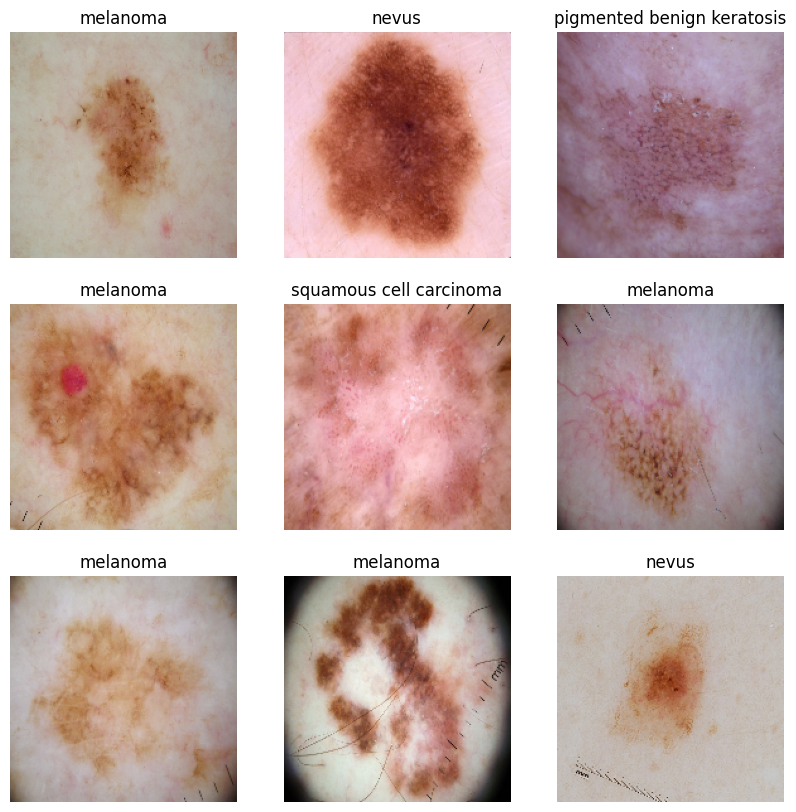

In [15]:
## Creating single images of each class
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### MODEL CREATION.

In [10]:
## Creating initial model layers.
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu",input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
## Compiling model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
## Checking model summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 84, 84, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 84, 84, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      57,803,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,873,705 (220.77 MB)

 Trainable params: 57,873,577 (220.77 MB)

 Non-trainable params: 128 (512.00 B)

In [13]:
## Fitting the model with 20 epochs.
epochs = 20
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.1602 - loss: 37.5592 - val_accuracy: 0.1499 - val_loss: 4.0064
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.2589 - loss: 1.9864 - val_accuracy: 0.1499 - val_loss: 2.7486
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.2973 - loss: 1.8893 - val_accuracy: 0.1499 - val_loss: 2.6411
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3293 - loss: 1.8311 - val_accuracy: 0.2170 - val_loss: 2.1515
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.3404 - loss: 1.7959 - val_accuracy: 0.1499 - val_loss: 4.6853
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.3644 - loss: 1.7152 - val_accuracy: 0.1499 - val_loss: 3.1593
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.2857 - loss: 1.9266 - val_accuracy: 0.3020 - val_loss: 3.4672
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.4222 - loss: 1.6117 - val_accuracy: 0.2461 - 

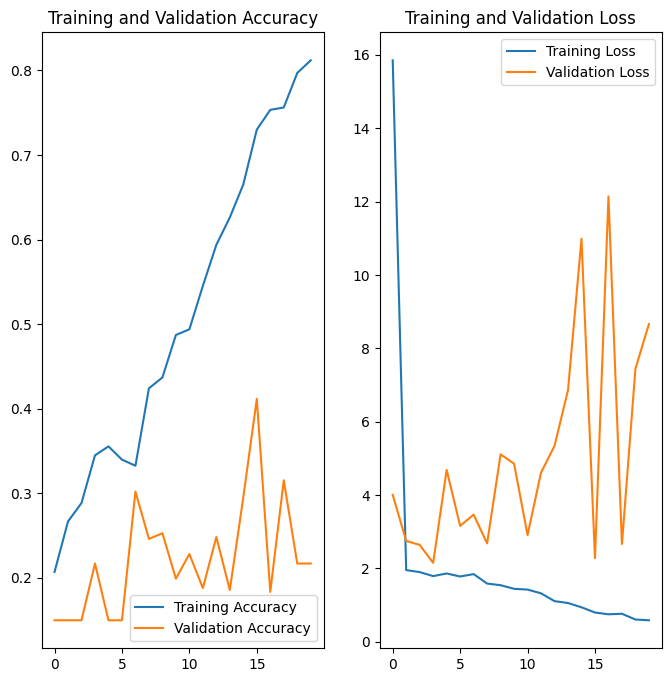

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **OBSERVATIONS FOR INITIAL MODEL**

* We can see that model is overfitting even after adding Dropout layers and BatchNormalization layers.

  train accuracy at 20th epoch - **0.8073**
<br>Validation accuracy at 20th epoch - **0.2170**

* From accuracy and loss plot for training and validation accuracy we can see that training accuracy is increasing gradually in an even manner with decrease in loss, but for validation set results are very uneven.

* This overfitting might be due to shortage of data or class imbalance.

In [15]:
## Using augmentation technique like rotation, zooming and adding contrast to improve data quality and reduce over fitting.

augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.1)
])

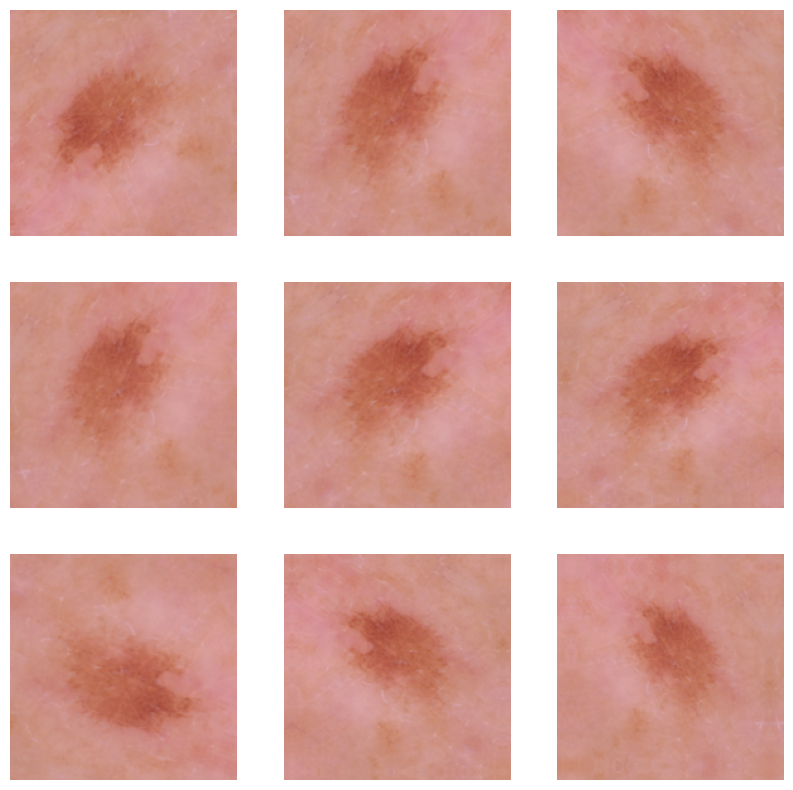

In [16]:
## Visualizing augmentation introduces to data.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [17]:
## Creating a new model with added augmentation layer.
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180,180,3)))
model.add(augmentation)
model.add(Conv2D(32, kernel_size=(3,3), activation="relu",input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

In [18]:
## Compiling model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
## Checking model summary.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 84, 84, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 84, 84, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      57,803,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,873,705 (220.77 MB)

 Trainable params: 57,873,577 (220.77 MB)

 Non-trainable params: 128 (512.00 B)

In [20]:
## fitting new model.
epochs = 20
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - accuracy: 0.2660 - loss: 12.8219 - val_accuracy: 0.3512 - val_loss: 2.2640
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.4251 - loss: 1.6213 - val_accuracy: 0.2058 - val_loss: 2.3958
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.4642 - loss: 1.5454 - val_accuracy: 0.2058 - val_loss: 2.1889
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.4570 - loss: 1.4931 - val_accuracy: 0.2483 - val_loss: 1.9290
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.4819 - loss: 1.4363 - val_accuracy: 0.2438 - val_loss: 2.0311
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.4873 - loss: 1.4642 - val_accuracy: 0.2461 - val_loss: 1.9902
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.4781 - loss: 1.4515 - val_accuracy: 0.2707 - val_loss: 2.3442
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.5060 - loss: 1.3937 - val_accuracy:

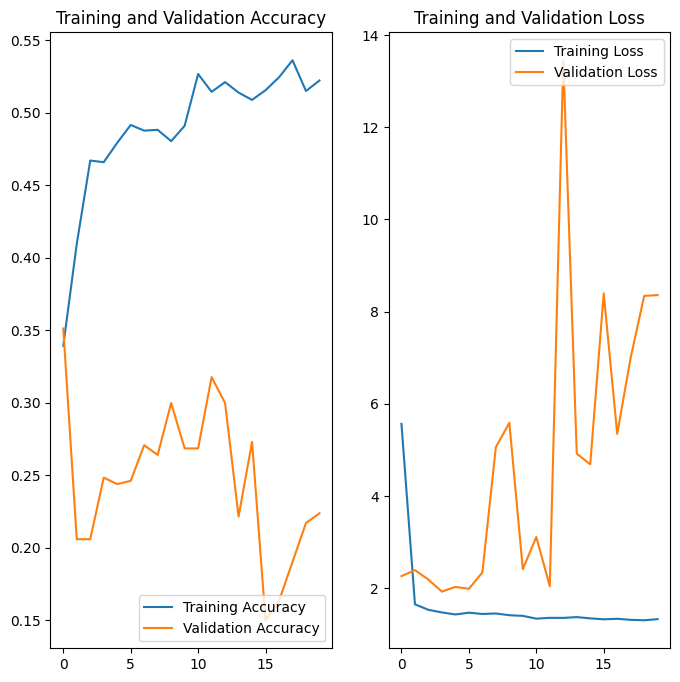

In [21]:
## Visualizing loss and accuracy of model.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### **OBSERVATIONS FOR MODEL WITH AUGMENTATION TECHNIQUE**

* In this model we observed that training and validation accuracy values are reduced eevn further, still training accuracy is greater than validation acccuracy.

  train accuracy at 20th epoch - **0.5265**
<br>Validation accuracy at 20th epoch - **0.2237**

* From accuracy and loss plot for training and validation accuracy we can see that training accuracy and validation accuracies are fluctuating with epochs.

* This overfitting might be due to less required number of epochs, insufficient training data or poor data quality..


In [22]:
## Creating a datafram to visualize class distribution in poresent data.
path_list=[]
lesion_list=[]

for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,/content/drive/My Drive/colab/Train/actinic ke...,actinic keratosis
1,/content/drive/My Drive/colab/Train/actinic ke...,actinic keratosis
2,/content/drive/My Drive/colab/Train/actinic ke...,actinic keratosis
3,/content/drive/My Drive/colab/Train/actinic ke...,actinic keratosis
4,/content/drive/My Drive/colab/Train/actinic ke...,actinic keratosis
...,...,...
2234,/content/drive/My Drive/colab/Train/vascular l...,vascular lesion
2235,/content/drive/My Drive/colab/Train/vascular l...,vascular lesion
2236,/content/drive/My Drive/colab/Train/vascular l...,vascular lesion
2237,/content/drive/My Drive/colab/Train/vascular l...,vascular lesion


Text(0.5, 1.0, 'CLASS DISTRIBUTION')

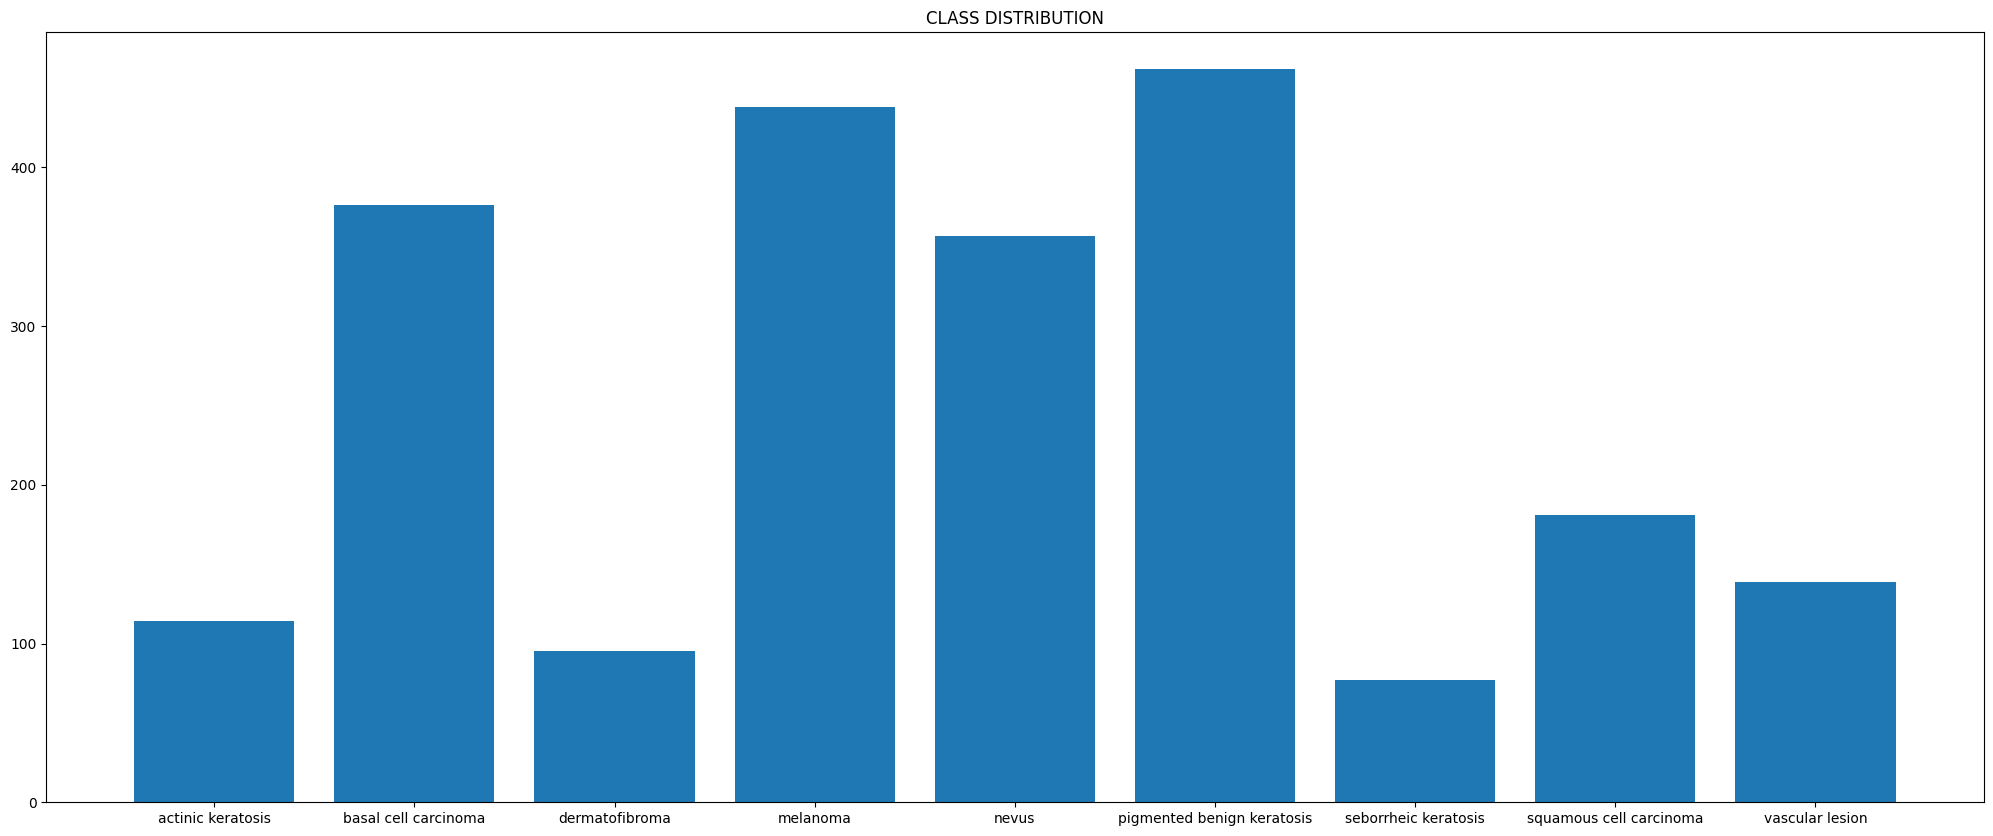

In [23]:
## Creating barplot based on classes.
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)
plt.title('CLASS DISTRIBUTION')

We can see there is class imbalance in dataset.

* Classes with least number of samples : **Seborrheic keratosis.**
* Classes that dominate the data in terms proportionate number of samples : **Melanoma, Nevus, Pigmented benign keratosis & Basal cell carcinoma.**


In [24]:
# Installing augmentor package.
!pip install Augmentor

In [25]:
## creating augmentor pipeline to add 500 sample to each class to rectify imbalance.
path_to_training_dataset='drive/My Drive/colab/Train'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to drive/My Drive/colab/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1D21F21A0>: 100%|██████████| 500/500 [00:25<00:00, 19.29 Samples/s]


Initialised with 376 image(s) found.
Output directory set to drive/My Drive/colab/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1E3DBFC40>: 100%|██████████| 500/500 [00:21<00:00, 23.44 Samples/s]


Initialised with 95 image(s) found.
Output directory set to drive/My Drive/colab/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EE1D21B1060>: 100%|██████████| 500/500 [00:19<00:00, 25.76 Samples/s]


Initialised with 438 image(s) found.
Output directory set to drive/My Drive/colab/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7EE1D20600D0>: 100%|██████████| 500/500 [01:30<00:00,  5.56 Samples/s]


Initialised with 357 image(s) found.
Output directory set to drive/My Drive/colab/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1D20670A0>: 100%|██████████| 500/500 [01:14<00:00,  6.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to drive/My Drive/colab/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1E3DBF2B0>: 100%|██████████| 500/500 [00:21<00:00, 23.74 Samples/s]


Initialised with 77 image(s) found.
Output directory set to drive/My Drive/colab/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EE230096AD0>: 100%|██████████| 500/500 [00:41<00:00, 12.08 Samples/s]


Initialised with 181 image(s) found.
Output directory set to drive/My Drive/colab/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1E3DBD3F0>: 100%|██████████| 500/500 [00:19<00:00, 25.78 Samples/s]


Initialised with 139 image(s) found.
Output directory set to drive/My Drive/colab/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE1ED30C0D0>: 100%|██████████| 500/500 [00:21<00:00, 23.28 Samples/s]


In [26]:
## Counting new number of images.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [27]:
## creating a path list.
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/My Drive/colab/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_2159b5ef-e088-4dbd-b65a-393a62d73ace.jpg',
 '/content/drive/My Drive/colab/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031922.jpg_c0876f10-3e7a-4232-9cdc-fed8dfbbb175.jpg',
 '/content/drive/My Drive/colab/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_c3bafaed-2b04-4866-b020-150d7085cbf9.jpg',
 '/content/drive/My Drive/colab/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029309.jpg_23170940-00ec-4d32-a9b3-ccceb96a81e5.jpg',
 '/content/drive/My Drive/colab/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_5e0a3838-46fd-43e6-bbfc-60442d98f2ef.jpg',
 '/content/drive/My Drive/colab/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031381.jpg_c4b4c333-4506-4a8a-8f42-1f23b5d42af6.jpg',
 '/content/drive/My Drive/colab/Train/actinic keratosis/output/actinic keratosis_original_ISIC_00292

In [28]:
# creating respective class list
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [29]:
## creating a data frame with path and lesion list
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [30]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2])

In [31]:
## Checking count of each class in dataframe.
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


In [32]:
## creating parameters for training and validation data.
batch_size = 32
img_height = 180
img_width = 180

In [33]:
## Creating training data.
data_dir_train="drive/My Drive/colab/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [34]:
## Creating validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [35]:
## Creating model layers for new data.
model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
## Compiling the model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
## Checking model summary.
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 176, 176, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 84, 84, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 84, 84, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      57,803,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,873,833 (220.77 MB)

 Trainable params: 57,873,641 (220.77 MB)

 Non-trainable params: 192 (768.00 B)

In [38]:
## Fitting the model.
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 65s 308ms/step - accuracy: 0.2542 - loss: 29.3230 - val_accuracy: 0.1277 - val_loss: 4.9700
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 250ms/step - accuracy: 0.2872 - loss: 1.9621 - val_accuracy: 0.1180 - val_loss: 9.6057
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 84s 260ms/step - accuracy: 0.3343 - loss: 1.7806 - val_accuracy: 0.1581 - val_loss: 9.9800
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 84s 270ms/step - accuracy: 0.3500 - loss: 1.7245 - val_accuracy: 0.3497 - val_loss: 23.3837
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 257ms/step - accuracy: 0.3644 - loss: 1.6869 - val_accuracy: 0.4024 - val_loss: 7.6413
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 79s 242ms/step - accuracy: 0.3857 - loss: 1.5972 - val_accuracy: 0.3794 - val_loss: 4.5821
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 84s 254ms/step - accuracy: 0.3938 - loss: 1.5808 - val_accuracy: 0.2814 - val_loss: 8.6982
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 254ms/step - accuracy: 0.3985 - loss:

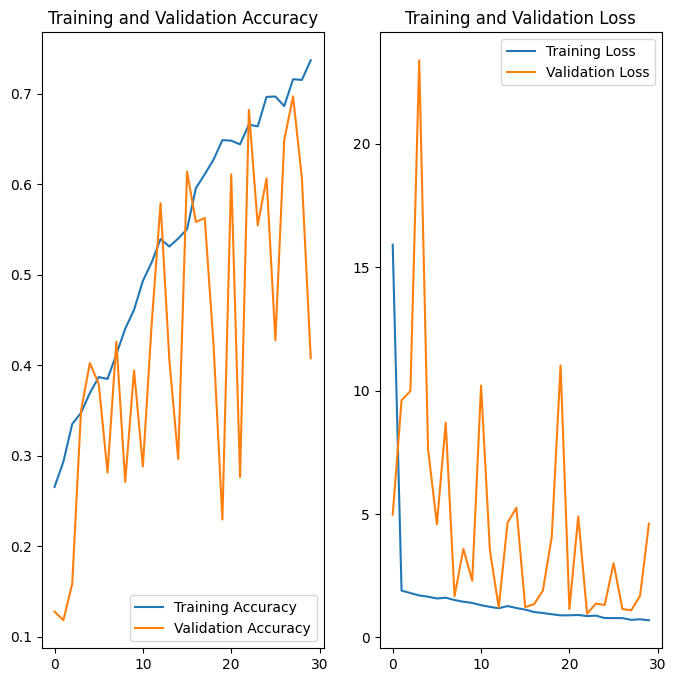

In [39]:
## Visualizing accuracy and loss trend for model.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **OBSERVATIONS FOR MODEL WITH handeled class imbalance**

* We can see that there is slight improvement in this model after hyperparameter tuning and adding batch normalization after each layer.

  train accuracy at 30th epoch - **0.7387**
<br>Validation accuracy at 30th epoch - **0.4076**

* From accuracy and loss plot for training and validation accuracy we can see that training accuracy is increasing rather smoothly with each epoch but validation accuracy is ultimately increasing with sudden drops between epochs.

* here even after 30 epochs we can say our model is overfitting, while it performed really well in 27th and 28th epoch where both training and validation accuries were ~ 65% and close to each other..